#.0. Data Loading and inspection

[先點此下載Investment.csv](https://drive.google.com/file/d/1x9GvjSRwNP-06q0TFfFrLLC0dYOhuOHL/view?usp=drive_link)

In [5]:
!pip install gdown

# 匯入 gdown
import gdown

# 設置檔案 ID
file_id = '1x9GvjSRwNP-06q0TFfFrLLC0dYOhuOHL'

# 下載檔案到 Colab
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'Investment.csv', quiet=False)

# 確認檔案是否下載成功
!ls

Downloading...
From: https://drive.google.com/uc?export=download&id=1x9GvjSRwNP-06q0TFfFrLLC0dYOhuOHL
To: /content/Investment.csv
100%|██████████| 12.2M/12.2M [00:00<00:00, 48.5MB/s]

figure	Investment.csv	sample_data



[先點此下載continents.csv](https://drive.google.com/file/d/11FqoD-viIMx-4CopdaOC2Eq4P9-3tpDv/view?usp=drive_link)

In [6]:
!pip install gdown

# 匯入 gdown
import gdown

# 設置檔案 ID
file_id = '11FqoD-viIMx-4CopdaOC2Eq4P9-3tpDv'

# 下載檔案到 Colab
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'continents.csv', quiet=False)

# 確認檔案是否下載成功
!ls

Downloading...
From: https://drive.google.com/uc?export=download&id=11FqoD-viIMx-4CopdaOC2Eq4P9-3tpDv
To: /content/continents.csv
100%|██████████| 19.7k/19.7k [00:00<00:00, 18.7MB/s]

continents.csv	figure	Investment.csv	sample_data


In [7]:
!pip install pandas seaborn matplotlib plotly numpy catboost category-encoders shap lime xgboost imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.6 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2fe3cca728ff9fbfc0cd3ab7783e67cea5dbbf783820fcaece77da6029d01c5c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import pickle
import shap
import torch
import torch.nn as nn
import torch.optim as optim
import plotly.express as px
import plotly.graph_objects as go
from catboost import CatBoostClassifier
from category_encoders import BinaryEncoder, TargetEncoder
from datetime import datetime
from lime import lime_tabular
from scipy import stats
from scipy.stats import randint, loguniform, uniform, chi2_contingency
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    RocCurveDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay,
    f1_score, accuracy_score, precision_score, recall_score
)
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

sns.set_theme()

In [9]:
df_uncleaned = pd.read_csv("Investment.csv", encoding='unicode_escape')

In [10]:
print("Investments shape is: ", df_uncleaned.shape)

Investments shape is:  (49438, 39)


In [11]:
df_uncleaned.head(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0


Notes: Funding total usd is read as object instead of float/int, also data columns are not the right data type

In [12]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Notes: Since some column names have the wrong format, we fix it

In [13]:
df_uncleaned = df_uncleaned.rename({' funding_total_usd ': 'funding_total_usd', ' market ': 'market'}, axis='columns')

Notes: High number of duplicates come from a lot of empty rows, which we need to drop

In [14]:
duplicates_count = df_uncleaned['permalink'].duplicated(keep=False).sum()
print(f"Number of duplicated entries in 'permalink' column: {duplicates_count}")


Number of duplicated entries in 'permalink' column: 4


The goal is to predict whether a start-up is successful or not. We can rely on classification and the final target column will be the column "Status".

In [15]:
status_counts = df_uncleaned['status'].value_counts(dropna=False)
check = len(df_uncleaned) - status_counts.get('acquired', 0) - status_counts.get('closed', 0) - status_counts.get('operating', 0)
missing_values = df_uncleaned["status"].isna().sum()
other = check - missing_values

print(f"There are {status_counts.get('acquired', 0)} acquired companies")
print(f"There are {status_counts.get('closed', 0)} closed companies")
print(f"There are {status_counts.get('operating', 0)} operating companies")
print(f"There are {missing_values} NaN values")
print(f"There are {other} other values")

There are 3692 acquired companies
There are 2603 closed companies
There are 41829 operating companies
There are 1314 NaN values
There are 0 other values


We have a overrepresentation of operating companies and a low amount of closed companies. This indicates that the model will most likely overly predict Start-ups as successful than unsuccessful.

#.1. Data Cleaning

##1.1 Deleting unnecessary columns

To reduce unnecessary and redundant data, we delete columns that are not relevant for model development. We want to remove post_ipo_equity and post_ipo_debt as well since this they are not interesting to us, as we are only looking at Start-ups.

In [16]:
df_clean = df_uncleaned.copy()

In [17]:
df_clean = df_clean.drop(["permalink", "homepage_url", "post_ipo_equity", "post_ipo_debt"], axis=1)

In [18]:
df_clean

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,...,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,...,0,0,0,0,0,0,0,0,0,0
2,Rock' Your Paper,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,...,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,...,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,London,1,...,0,0,0,0,0,0,0,0,0,0
49434,ZZNode Science and Technology,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,Beijing,1,...,0,0,1587301,0,0,0,0,0,0,0
49435,Zzzzapp Wireless ltd.,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,Split,5,...,0,0,0,0,0,0,0,0,0,0
49436,[a]list games,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0


##1.2 Cleaning columns

"funding_total_usd" has the wrong format, and some column names are not trimmed.

Notes:

Ensure column names are trimmed

Directly convert 'funding_total_usd' to a float, thereby also transforming "-" to NaN

In [19]:
df_clean.columns = df_clean.columns.str.strip()
df_clean['funding_total_usd'] = pd.to_numeric(df_clean['funding_total_usd'].str.replace(',', ''), errors='coerce')
df_clean["funding_total_usd"].dtype
df_clean.head(5)

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,...,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,...,0,0,0,0,0,0,0,0,0,0
2,Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,...,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,...,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,...,0,0,0,0,0,0,0,0,0,0


Notes: Turning all of our Date Columns into pd.datetime, to ensure consistency and the right data type

In [20]:
df_clean['founded_at'] =  pd.to_datetime(df_clean['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df_clean['first_funding_at'] =  pd.to_datetime(df_clean['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df_clean['last_funding_at'] =  pd.to_datetime(df_clean['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df_clean['founded_year'] =  pd.to_datetime(df_clean['founded_year'], format='%Y', errors = 'coerce')
df_clean['founded_month'] =  pd.to_datetime(df_clean['founded_month'], format='%Y-%m', errors = 'coerce')

Notes: Cleaning the Market column, since it has unnecessary spaces

In [21]:
df_clean['market'] = df_clean['market'].str.strip()

##1.3 Check and drop NaN

Examine all potential missing data across variables to identify any underlying patterns.

Notes:

Calculate the number of missing values for each column in df_clean

Calculate the percentage of missing values for each column

Create a DataFrame to analyze missing data

                                    Column  Missing Values  \
state_code                      state_code           19277   
founded_quarter            founded_quarter           10956   
founded_month                founded_month           10956   
founded_year                  founded_year           10956   
founded_at                      founded_at           10885   
funding_total_usd        funding_total_usd            8531   
city                                  city            6116   
country_code                  country_code            5273   
region                              region            5273   
market                              market            3968   
category_list                category_list            3961   
status                              status            1314   
first_funding_at          first_funding_at               1   
last_funding_at            last_funding_at               1   
name                                  name               1   
secondar

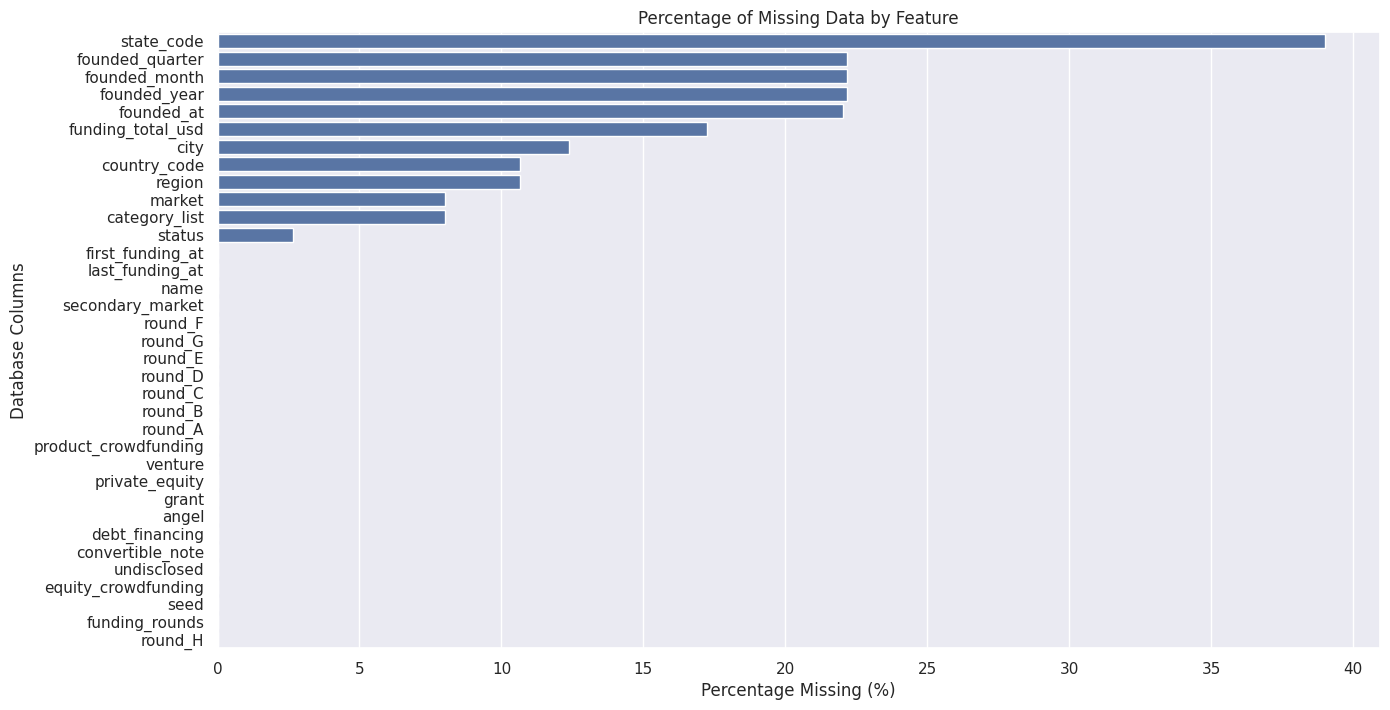

In [22]:
missing_counts = df_clean.isnull().sum()

missing_percentage = (missing_counts / len(df_clean)) * 100

missing_data = pd.DataFrame({
    'Column': df_clean.columns,
    'Missing Values': missing_counts,
    'Percentage Missing (%)': missing_percentage
}).sort_values(by='Percentage Missing (%)', ascending=False)

print(missing_data)

plt.figure(figsize=(15, 8))
sns.barplot(x='Percentage Missing (%)', y='Column', data=missing_data)
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Database Columns')
plt.show()

***Key Observations***

**1. Highly Missing Data:**

● State Code: Has the highest number of missing values at 19,277, suggesting many entries may lack this information, possibly due to non-U.S. entries or incomplete records.

● Funding Total USD and City: Also have a significant number of missing values (8,531 and 6,116 respectively), impacting analyses dependent on geographical and funding insights.

**2. Moderate Missing Data:**

● Country Code and Region: Both have 5,273 missing entries, which could hinder geographic segmentation or market analysis.

● Market and Category List: Each missing 3,968   
 and 3,961 values respectively, potentially affecting industry-specific analyses.

**3. Minimal or No Missing Data:**

● Columns related to funding rounds (e.g., Round_A, Round_B), and operational metrics (e.g., Seed, Grant) show little to none missing data, suggesting well-maintained or mandatory fields.

***Interpretation and Implications***

**1. Geographic Data Gaps**

Significant missing values in State Code, City, Country Code, and Region imply challenges in performing detailed geographical analysis. This may be due to the dataset including global companies where such information is not uniformly available.

**2. Market and Category Gaps**

Missing data in market and category_list may impede specific industry or market-specific studies, as understanding the segments these companies operate in would be limited.

**3. Funding Gaps**

● One of the columns with the most missing data is 'Funding Total USD.' This is likely because these startups did not receive funding, which is quite normal, considering that VC can be highly selective, and only a small percentage of startups secure funding.

● For funding rounds columns (e.g., Pre-Seed, Seed, Series A), we can fill them with zeros rather than dropping them, because an empty value in a funding-related column does not necessarily mean we have to discard the row. As these rounds follow a chronological sequence, a startup might raise a Pre-Seed round and not proceed to raise any more rounds.

**4. Status Gaps**

The key variable for analysis is the "status" column, which is essential for constructing the target variable. Rows with an empty status value are unusable and can be discarded.



Checking YEAR column

In our dataset, the founded_year column contains  10,956 missing entries.

In [23]:
df_clean["founded_year"].dtypes

dtype('<M8[ns]')

In [24]:
df_clean["founded_year"].isna().sum()

10956

● Choosing Imputation Over Dropping Values

Imputing founded_year values, especially since they represent years, is sensible as it preserves the dataset and avoid potential bias in the analysis. KNNImputer can estimate missing years by considering the similarity between entries. This method assumes that companies founded around similar times may exhibit similar characteristics.

● Data Preparation and Imputation Process

To comply with KNNImputer's requirements, the founded_year must be converted from datetime to integer format.

Notes:

Check if there are any non-conversible values that caused 'coerce' to produce NaN

Convert datetime to integer year

Initialize the KNN imputer and impute

Replace the original 'founded_year' column with the imputed values

Round to get integer year values

Check the imputation

In [25]:
if not pd.api.types.is_datetime64_any_dtype(df_clean['founded_year']):
    df_clean['founded_year'] = pd.to_datetime(df_clean['founded_year'], errors='coerce', format='%Y')

print("After conversion, null values:", df_clean['founded_year'].isnull().sum())

df_clean['founded_year'] = df_clean['founded_year'].dt.year

imputer = KNNImputer(n_neighbors=5, weights="uniform")
founded_year_imputed = imputer.fit_transform(df_clean[['founded_year']].astype(float))

df_clean['founded_year'] = founded_year_imputed.round()

print("Null values after imputation:", df_clean['founded_year'].isnull().sum())

After conversion, null values: 10956
Null values after imputation: 0


Notes: Status is part of our target variable, has a lot of important information. Since it cannot be properly imputed, we will drop all NaN´s in this column

In [26]:
df_clean = df_clean.dropna(subset=["status"])

print("Number of NaN: ", df_clean["status"].isna().sum())

Number of NaN:  0


In [27]:
df_clean[['convertible_note', 'angel', 'grant', 'private_equity',
       'secondary_market', 'product_crowdfunding', 'round_A','round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G','round_H']].fillna(0)

,convertible_note,angel,grant,private_equity,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49434,0,0,0,0,0,0,1587301,0,0,0,0,0,0,0
49435,25873,0,0,0,0,0,0,0,0,0,0,0,0,0
49436,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##1.5 Check for outliers

First start by focusing on those tied to funding rounds. We use box plots to spot any outliers in these important metrics. Since funding data can be pretty varied, some outliers might just be mistakes, while others could be valid extreme values. We apply domain-specific knowledge to figure out and decide whether to remove or tweak these outliers based on how they affect our analysis.

Notes: Filter out non-numeric columns if necessary

Plot box plots for each numeric variable

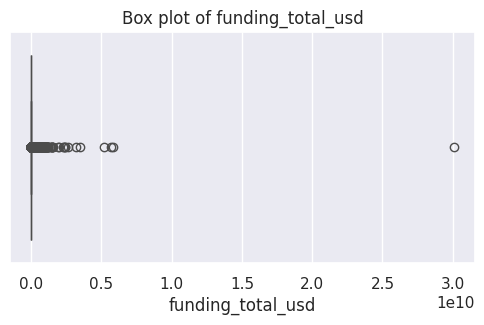

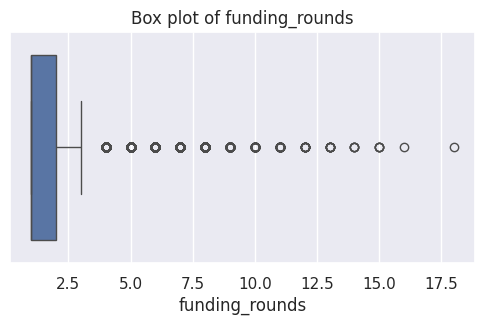

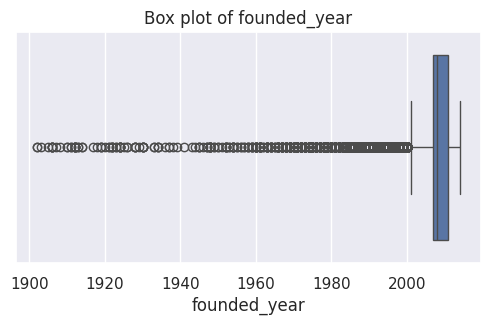

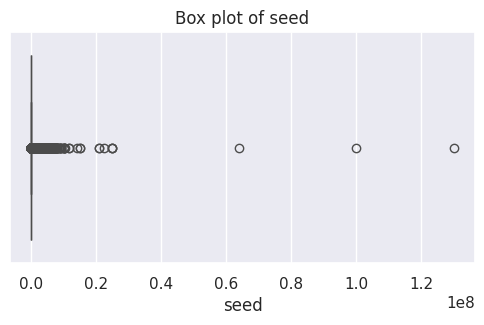

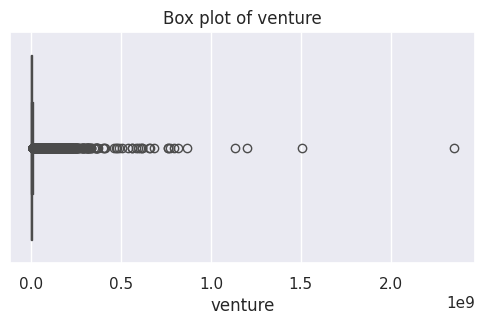

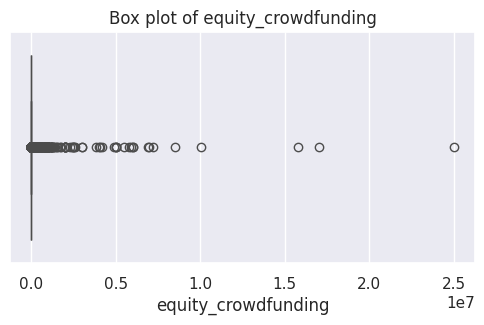

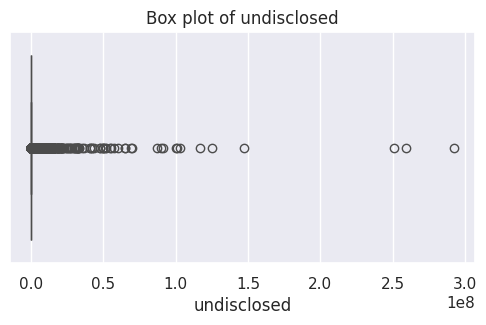

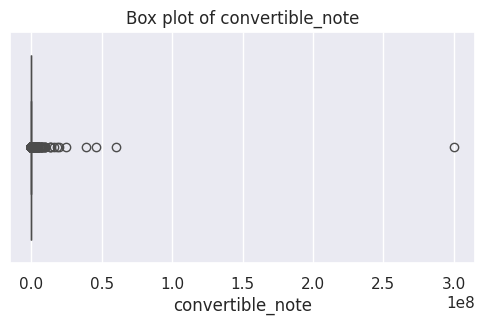

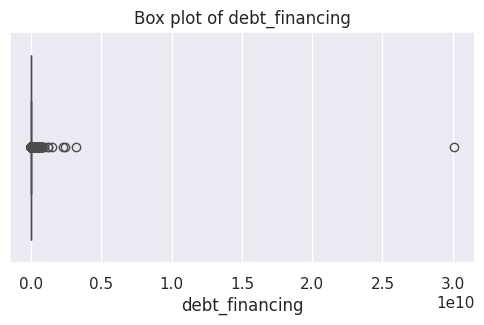

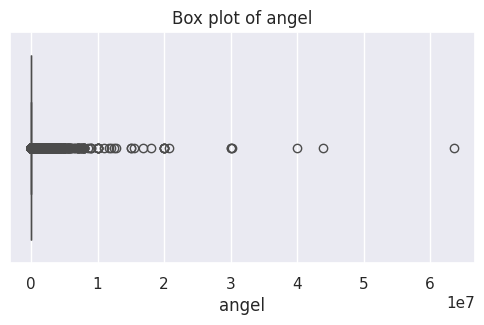

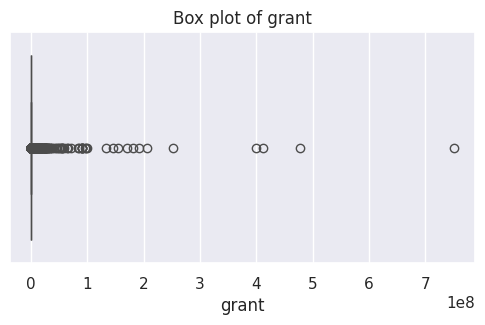

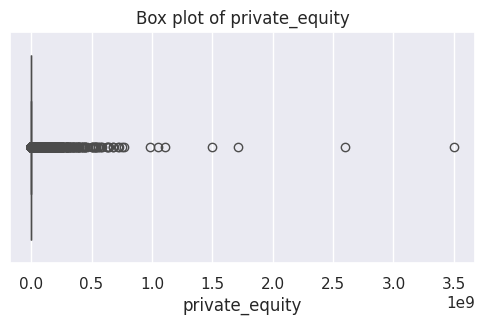

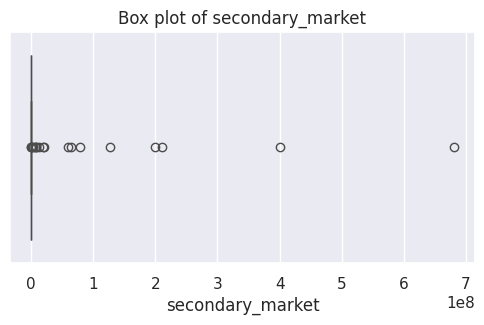

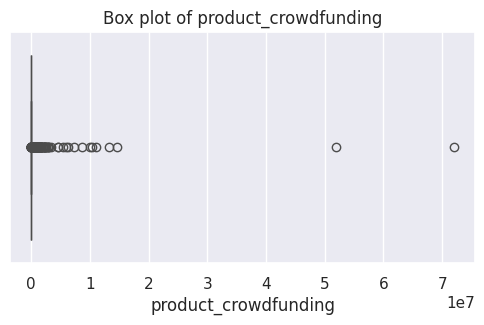

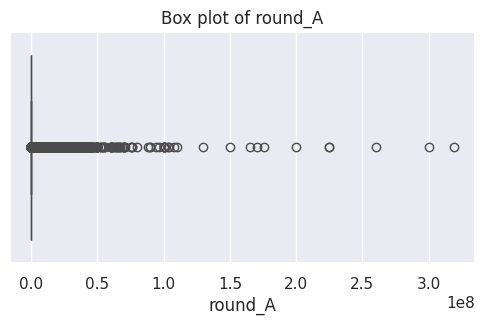

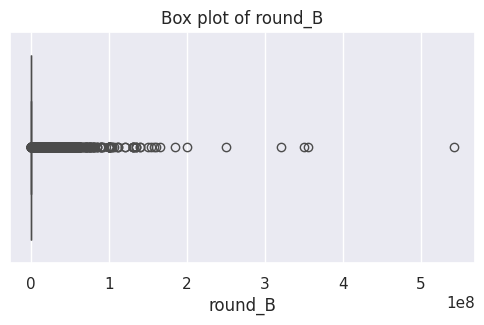

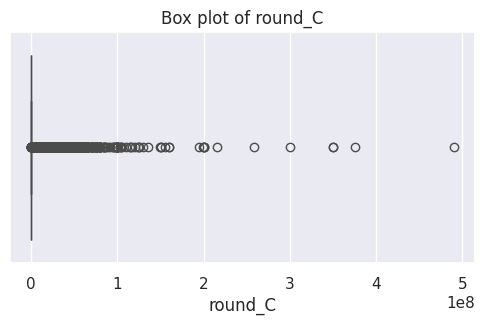

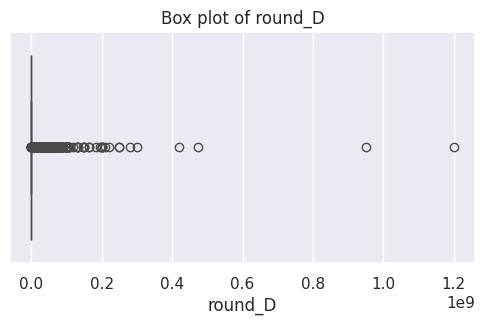

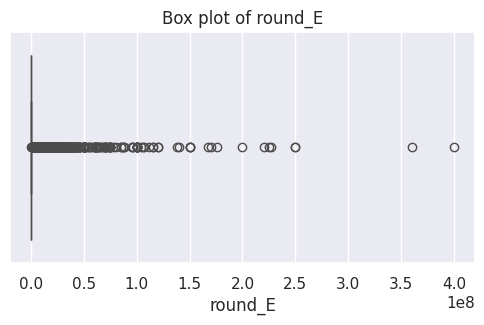

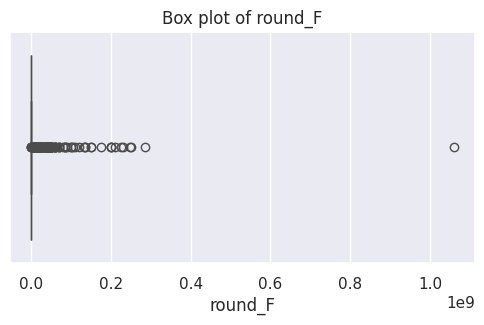

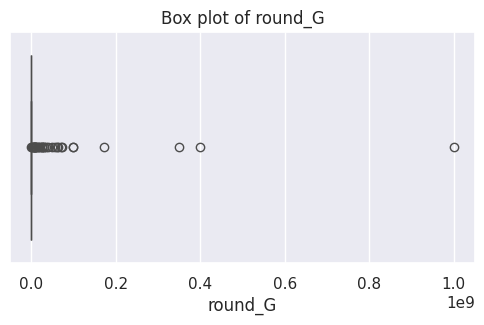

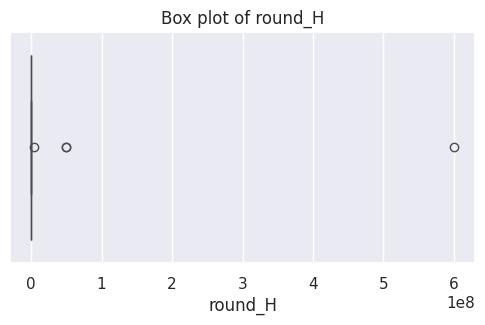

In [28]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64'])

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Box plot of {col}')
    plt.show()


The box plots show that the funding metrics are skewed. Most of the data points are concentrated at the lower end, with a long tail stretching out toward the higher values. This means there are some outliers and extreme values that can mess with how accurate the predictive model is. So, we have to check the dataset to find out why and see if we can apply some techniques to even things out.

Notes: Using the new cutoff values and updating the DataFrame

In [29]:
cutoffs = {
    'equity_crowdfunding': 3e6,  # $2 million
    'product_crowdfunding': 3e6,  # $2 million
    'undisclosed': 20e6,  # $15 million
    'venture': 50e6,  # $50 million
    'grant': 5e6,  # $5 million
    'private_equity': 300e6,  # $250 million
    'secondary_market': 100e6,  # $50 million
    'convertible_note': 5e6,  # $5 million
    'angel': 5e6,  # $5 million
    'seed': 10e6,  # $10 million
    'round_A': 20e6,  # $20 million
    'round_B': 30e6,  # $30 million
    'round_C': 40e6,  # $40 million
    'round_D': 60e6,  # $60 million
    'round_E': 80e6,  # $80 million
    'round_F': 100e6,  # $100 million
}

original_data_count = df_clean.shape[0]

for funding_type, cutoff in cutoffs.items():
    df_clean = df_clean[df_clean[funding_type] <= cutoff]

print(f"Original Data: {original_data_count} rows")
print(f"Data shape after removing high funding outliers: {df_clean.shape}")

Original Data: 48124 rows
Data shape after removing high funding outliers: (45702, 35)


Set cutoffs for different stages based on Ann's industry experience and domain knowledge to ensure our analysis remains relevant, aligns with industry standards, and enhances the reliability of our insights.

● Seed, Angel, and Early Rounds (A, B, C):

 These stages typically see smaller investment amounts. So we choose cutoffs that reflect common funding ranges and keep the dataset in most typical scenarios, avoiding rare mega-deals distortion.

● Later Rounds (D, E, F):

As startups grow and enter these later stages, they naturally need bigger investments to scale up operations or pursue aggressive expansion plans. The higher cutoffs help us avoid letting a few outsized rounds skew the overall picture.

● Specialized Funding Types (Private Equity, Equity Crowdfunding, etc.):

The dynamics here can be quite varied. The cutoffs we set ensure we exclude outlier data that could mislead our analysis.


In the following we check for outliers in the amount of funding rounds.

Notes:

Outlier analysis for funding_rounds

Define outliers as those beyond 1.5 times the IQR from the Q1 and Q3

Calculate Z-scores to identify outliers

Display the number of outliers detected by each method

Print the number of outliers detected by each method

In [30]:
Q1_funding_rounds = df_clean['funding_rounds'].quantile(0.25)
Q3_funding_rounds = df_clean['funding_rounds'].quantile(0.75)
IQR_funding_rounds = Q3_funding_rounds - Q1_funding_rounds

outliers_IQR_funding_rounds = df_clean[(df_clean['funding_rounds'] < (Q1_funding_rounds - 1.5 * IQR_funding_rounds)) | (df_clean['funding_rounds'] > (Q3_funding_rounds + 1.5 * IQR_funding_rounds))]

z_scores_funding_rounds = np.abs(stats.zscore(df_clean['funding_rounds']))
outliers_Z_funding_rounds = df_clean[z_scores_funding_rounds > 3]

outliers_IQR_count_funding_rounds = outliers_IQR_funding_rounds.shape[0]
outliers_Z_count_funding_rounds = outliers_Z_funding_rounds.shape[0]

print(f"Number of outliers detected by the IQR method: {outliers_IQR_count_funding_rounds}")
print(f"Number of outliers detected by the Z-score method: {outliers_Z_count_funding_rounds}")

Number of outliers detected by the IQR method: 2950
Number of outliers detected by the Z-score method: 1343


Notes:

Count the number of funding rounds

Use hue for the barplot

Add counts on top of the bars

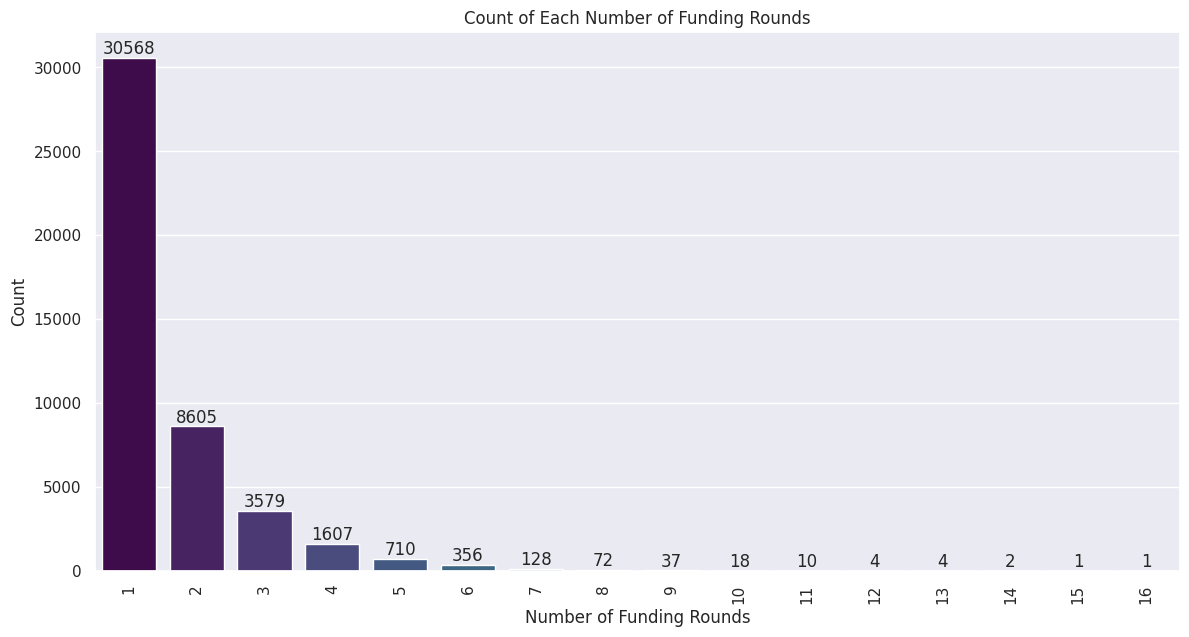

In [31]:
funding_rounds_counts = df_clean['funding_rounds'].value_counts().sort_index()

plt.figure(figsize=(14, 7))

sns.barplot(x=funding_rounds_counts.index, y=funding_rounds_counts.values, hue=funding_rounds_counts.index, palette='viridis', legend=False)

for i, count in enumerate(funding_rounds_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Count of Each Number of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#.2. Analysis

In [32]:
top_spheres = df_clean['market'].value_counts()[:10]

fig = px.pie(values=top_spheres, names=top_spheres.index, title='Top 10 Most Frequent Markets')
fig.show()

Statistics

In [33]:
print('Mean total funding (in $):', df_clean['funding_total_usd'].mean())
print('Median total funding (in $):', df_clean['funding_total_usd'].median())
print('Mean year founded:', round(df_clean['founded_year'].mean()))
print('The oldest company: ', int(min(df_clean['founded_year'])))
print('The latest company: ', int(max(df_clean['founded_year'])))
print('Standard deviation of seed funding:', df_clean['seed'].std())

Mean total funding (in $): 9796231.990797218
Median total funding (in $): 1620015.0
Mean year founded: 2007
The oldest company:  1902
The latest company:  2014
Standard deviation of seed funding: 642031.1754204246


So most of the startups are operating

In [34]:
fig = px.histogram(df_clean['status'], title='Startups status', color_discrete_sequence=["mediumpurple"])
fig.update_xaxes(categoryorder='total ascending')
fig.show()

Each round startups get less and less money – because they can make profit themselves

In [35]:
rounds = {}
for i in df_clean.columns:
    if 'round_' in i:
        rounds[i] = df_clean[i].mean()/10**6
fig = px.histogram(x=rounds.keys(), y=rounds.values(), labels={'y': 'Investment ($ million)', 'x': 'Rounds'}, color_discrete_sequence=["limegreen"]);
fig.show()

Most of the startups' capital injection come from VC who are professional investors

In [36]:
fig = px.histogram(x=['angel', 'grant', 'venture'],
                   y=[len(df_clean[df_clean['angel']!=0]),len(df_clean[df_clean['grant']!=0]), len(df_clean[df_clean['venture']!=0])],
                   title='Startups investment sources',
                  color_discrete_sequence=["tomato"]);
fig.update_xaxes(categoryorder='total ascending')
fig.show()

In [37]:
top_countries = df_clean['country_code'].value_counts()[:10]
fig = px.pie(values=top_countries, names=top_countries.index, title='Top 10 most popular regions for a startup');
fig.show()

USA has the most funding

In [38]:
funds_by_country = {}
for c in set(df_clean['country_code']):
    funds_by_country[c] = df_clean[df_clean['country_code']==c]['funding_total_usd'].sum()/10**9

funds_by_country = sorted(funds_by_country.items(), key=lambda x: x[1], reverse=True)

fig = px.histogram(
    y=[x[0] for x in funds_by_country][:10],
    x=[x[1] for x in funds_by_country][:10],
    labels={'x': 'Total fund ($ billions)', 'y': 'Country'},
    title='Top 10 countries by total funding');
fig.show()

In [39]:
top_companies = df_clean.sort_values(by=['funding_total_usd'], ascending=False)[:25]

fig = px.histogram(data_frame=top_companies, y='funding_total_usd',
x='name',
title='Top 25 most successfull companies',
labels={'x': 'Total funding', 'y': 'Company'},
color='founded_year');
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.show()

## 2.1 Correlation

In [40]:
correlation_matrix = df_clean.select_dtypes(include=['number']).corr()
fig = px.imshow(correlation_matrix, title='Correlation heatmap')
fig.show()

## 2.2 Hypothesis

Hypothesis: startup will less likely go out of business at less popular market

See dependency between closed and market variables

In [41]:
markets = {}
ind = 0
for market in set(df_clean['market']):
    closed = len(df_clean[(df_clean['market']==market)&(df_clean['status']=='closed')])
    markets[f"{market}"] = [closed, len(df_clean[df_clean['market']==market])/len(df_clean)*100]
    ind += 1
markets = pd.DataFrame.from_dict(markets, orient='index', columns=[ 'closed', 'share'])
markets = markets.sort_values(by='closed', ascending=False)
markets.to_csv('markets.csv')

The closer market to the top, the more 'yellow' its market share becomes.

Choose less popular markets may give us a greater chance to succeed!

In [42]:
fig = px.imshow(
    markets[['share']][:20],
    aspect='auto',
    title='Top 20 markets where startups close',
    labels=dict(x="Market share", y="Markets", color="Market share (%)"),
)
fig.show()

Hypothesis: the seed you raise depends on the founded quater

Which quater is the ideal timing to start our first fund raising?

In [43]:
df_clean['founded_quarter'].head()

,founded_quarter
0,2012-Q2
1,NaN
2,2012-Q4
3,2011-Q2
4,2014-Q1


In [44]:
def separate_quater(text: str):
    if pd.isna(text) or text == '':
        return None
    return text.split('-')[-1]

df_clean['quater'] = df_clean['founded_quarter'].apply(separate_quater)

df_clean.to_csv('cleaned_data.csv', index=False)

In [45]:
df_clean = df_clean.dropna(subset=['quater'])

df_clean.loc[:, 'seed'] = pd.to_numeric(df_clean['seed'], errors='coerce')

df_clean = df_clean.dropna(subset=['seed'])

fig = px.icicle(
    df_clean,
    path=[px.Constant("all"), 'quater'],
    values='seed',
    title='Seed values for various quaters'
)
fig.show()

It's true that Q1 is the most popular option among investors. Startups should make sure to submit an application for seed funding in the 1st Quater.

In [46]:
df_clean_by_q_sort = df_clean.sort_values(by='quater')
num_seed = []
for q in df_clean_by_q_sort['quater'].unique():
    num_seed.append(len(df_clean_by_q_sort[(df_clean_by_q_sort['quater']==q)&(df_clean_by_q_sort['seed'] > 0)]))
fig = px.histogram(
    y=num_seed,
    x=df_clean_by_q_sort['quater'].unique(),
    title='Quater x Seed popularity plot',
    color_discrete_sequence=["teal"],
    labels={'x': 'Quater the startup was founded at',
    'y': 'Number of seeds raised'})
fig.show()

In VC, having more than 10 funding rounds is pretty rare. It usually means the company is facing ongoing profitability issues or needs a lot of money, which isn’t common in typical investment cycles.

By capping funding rounds at 10, we ensure our dataset reflects standard venture funding patterns, enhancing our model’s relevance and predictive accuracy.



In [47]:
print("Data shape before removing funding rounds outliers:", df_clean.shape)
df_clean = df_clean[df_clean['funding_rounds'] <= 10]
print("Data shape after removing funding rounds outliers:", df_clean.shape)

Data shape before removing funding rounds outliers: (35557, 36)
Data shape after removing funding rounds outliers: (35539, 36)


## 2.3 Data

First visualize the distribution of categorical and numerical variables.

In [48]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns
print("Frequencies of categorical features:\n")
df_clean[categorical_columns].describe().T

Frequencies of categorical features:



,count,unique,top,freq
name,35538,35494,Roost,3
category_list,33766,14194,|Software|,2738
market,33761,730,Software,3587
status,35539,3,operating,30865
country_code,32662,110,USA,21645
state_code,22661,61,CA,7369
region,32662,990,SF Bay Area,5108
city,32254,3532,San Francisco,2092
founded_quarter,35539,209,2012-Q1,2752
quater,35539,4,Q1,23263


Market Concentration:

Most Common Market: The 'Software' market is the predominant category, encompassing 3289/31788= 10.3% of entries, highlighting a significant focus on software-related ventures within the dataset.

Company Status: Operating Status: A vast majority of companies (29060 out of 33378) are still operating, suggesting low rates of closure or failure.

Geographical Distribution: Country and State: The USA, specifically California (CA), dominates the geographical landscape of the dataset. This indicates a heavy concentration of companies in the United States, particularly in a state known for its vibrant startup ecosystem.

City and Region: San Francisco in the SF Bay Area is the most represented city and region, which aligns with California's known status as a tech hub, especially for new ventures and startups.

Company Foundation: Founded Quarter: Most companies were founded in '2012-Q1', suggesting a significant founding activity during this period. This could correlate with economic cycles or industry trends at the time.

In [49]:
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Distribution of numerical features:\n")
df_clean[numerical_columns].describe().T

Distribution of numerical features:



,count,mean,std,min,25%,50%,75%,max
funding_total_usd,29350.0,9.745092e+06,1.848672e+08,14.0,300000.0,1600000.0,7250000.0,3.007950e+10
funding_rounds,35539.0,1.666732e+00,1.146566e+00,1.0,1.0,1.0,2.0,1.000000e+01
founded_year,35539.0,2.007613e+03,7.272875e+00,1902.0,2006.0,2010.0,2012.0,2.014000e+03
seed,35539.0,2.436265e+05,6.827684e+05,0.0,0.0,0.0,60000.0,1.000000e+07
venture,35539.0,4.051666e+06,8.482531e+06,0.0,0.0,0.0,3875246.5,5.000000e+07
equity_crowdfunding,35539.0,3.542052e+03,6.242936e+04,0.0,0.0,0.0,0.0,3.000000e+06
undisclosed,35539.0,4.128934e+04,6.102614e+05,0.0,0.0,0.0,0.0,2.000000e+07
convertible_note,35539.0,9.984392e+03,1.409589e+05,0.0,0.0,0.0,0.0,5.000000e+06
debt_financing,35539.0,1.743398e+06,1.612015e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,35539.0,5.675084e+04,3.031525e+05,0.0,0.0,0.0,0.0,5.000000e+06


Funding Dynamics: Total Funding: The funding_total_usd spans a vast range, from a minimum of 1 to a maximum of 5,700,000,000 reflecting a substantial disparity in the amount of funding companies receive.

Funding Rounds: Companies have between 1 and 10 funding rounds, with a median of 2 rounds, indicating that most companies do not proceed beyond the initial stages of funding.

Company Longevity: Years of Operation: The founded_year ranges from 1995 to 2014, with a mean year of 2008. This suggests that the majority of companies in the dataset are relatively young, emphasizing the dataset's focus on newer businesses.

Investment Types: Venture Funding: Averages around $3,973,437 with significant variability, indicating that venture capital is a primary source of funding with wide-ranging investment amounts.

Seed Funding: Typically smaller amounts, indicating its role in early-stage support for businesses.

Private Equity and Grants: Show high variability, which can be attributed to their sporadic use across different sectors and business models.

Funding Over Time: Date Ordinals: The first_funding_at_ordinal and last_funding_at_ordinal suggest that most funding activity concentrates closer to the company's founding date. This could be indicative of a high initial funding need followed by a period of lesser external funding reliance.

## 2.4 Time related Features

<Axes: xlabel='founded_year', ylabel='Count'>

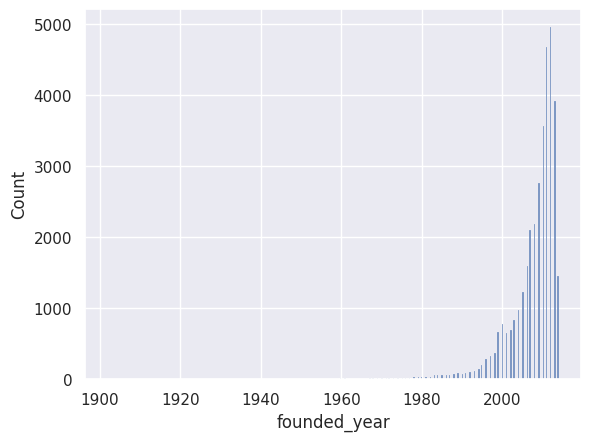

In [50]:
import seaborn as sns
sns.histplot(df_clean['founded_year'].dropna(), kde=False)

Notes:

Print data shape before removing

Filtering the DataFrame to remove rows where 'founded_year' is before 1990

Print data shape after removing

In [51]:
print("Data shape before removing years before 1990:", df_clean.shape)
df_clean = df_clean[df_clean['founded_year'] >= 1990]
print("Data shape after removing years before 1990:", df_clean.shape)

Data shape before removing years before 1990: (35539, 36)
Data shape after removing years before 1990: (34690, 36)


<Axes: xlabel='founded_year', ylabel='Count'>

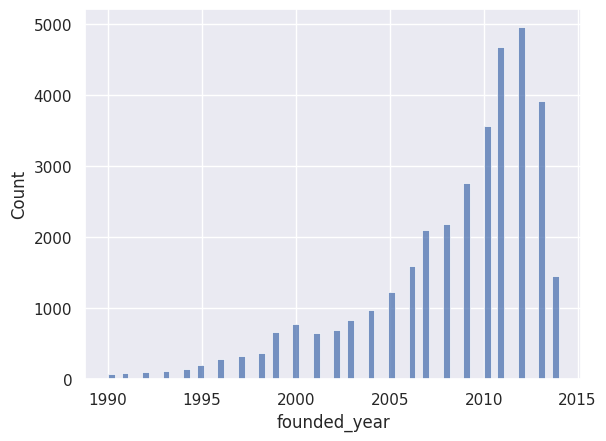

In [52]:
sns.histplot(df_clean['founded_year'].dropna(), kde=False)

In analyzing startup data, the founded_year helps assess company maturity. Extremely old founding years might not only skew analyses but also represent entities not reflective of current entrepreneurial trends and market dynamics. Using Interquartile Range (IQR) and Z-score methods, we identify and remove these outliers. This ensures our dataset remains focused on entities relevant to today's business environment, enhancing the reliability and relevance of our findings by excluding atypical or outdated companies.

Now we will check if the other time-related columns still have outlier (specially focusing on lower outliers)

Convert datetime to ordinal

Compute Q1, Q3, and IQR

Define bounds for outliers

Count outliers using IQR

Count outliers using Z-scores

Applying the function to each column

In [53]:
def calculate_datetime_outliers(df, column_name):

    df[column_name + '_ordinal'] = df[column_name].map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

    Q1 = df[column_name + '_ordinal'].quantile(0.25)
    Q3 = df[column_name + '_ordinal'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_outliers_IQR_count = df[df[column_name + '_ordinal'] < lower_bound].shape[0]
    upper_outliers_IQR_count = df[df[column_name + '_ordinal'] > upper_bound].shape[0]

    z_scores = np.abs(stats.zscore(df[column_name + '_ordinal'].dropna()))
    outliers_Z_count = np.sum(z_scores > 3)

    print(f"Lower outliers count for {column_name} (IQR method): {lower_outliers_IQR_count}")
    print(f"Upper outliers count for {column_name} (IQR method): {upper_outliers_IQR_count}")
    print(f"Outliers count for {column_name} (Z-score method): {outliers_Z_count}")

datetime_columns = ['founded_at', 'founded_month', 'first_funding_at', 'last_funding_at']
for column in datetime_columns:
    if column in df_clean.columns:
        calculate_datetime_outliers(df_clean, column)

Lower outliers count for founded_at (IQR method): 1621
Upper outliers count for founded_at (IQR method): 0
Outliers count for founded_at (Z-score method): 501
Lower outliers count for founded_month (IQR method): 1621
Upper outliers count for founded_month (IQR method): 0
Outliers count for founded_month (Z-score method): 501
Lower outliers count for first_funding_at (IQR method): 586
Upper outliers count for first_funding_at (IQR method): 2
Outliers count for first_funding_at (Z-score method): 397
Lower outliers count for last_funding_at (IQR method): 1184
Upper outliers count for last_funding_at (IQR method): 0
Outliers count for last_funding_at (Z-score method): 341


After already having dropped the outliers for funding_year before, we use z-scores for dropping outliers in datetime data to provide a statistically rigorous approach that considers the distribution of the data and effectively handles extreme values.

Notes:

Drop outliers for datetime columns using z-score

Convert datetime to ordinal

Calculate z-scores

Find outliers based on z-score threshold

Drop rows with outliers

Calculate and display number of rows dropped

Display shape before dropping outliers (overall)

Applying the function to each datetime column

Display shape after dropping outliers (overall)

In [54]:
def drop_datetime_outliers(df, column_name, z_threshold=3):
    df[column_name + '_ordinal'] = df[column_name].map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

    z_scores = np.abs(stats.zscore(df[column_name + '_ordinal'].dropna()))

    outliers_indices = np.where(z_scores > z_threshold)[0]

    df.drop(df.index[outliers_indices], inplace=True)

    num_rows_dropped = len(outliers_indices)
    print(f"Number of rows dropped for {column_name}: {num_rows_dropped}")

print(f"Shape before dropping outliers (overall): {df_clean.shape}")

datetime_columns = ['founded_at', 'founded_month', 'first_funding_at', 'last_funding_at']
for column in datetime_columns:
    if column in df_clean.columns:
        drop_datetime_outliers(df_clean, column)

print(f"Shape after dropping outliers (overall): {df_clean.shape}")

Shape before dropping outliers (overall): (34690, 40)
Number of rows dropped for founded_at: 501
Number of rows dropped for founded_month: 197
Number of rows dropped for first_funding_at: 355
Number of rows dropped for last_funding_at: 259
Shape after dropping outliers (overall): (33378, 40)


Notes: Distribution of numerical columns after outlier analysis to check, if all still have values in them

In [55]:
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Distribution of numerical features:\n")
df_clean[numerical_columns].describe().T

Distribution of numerical features:



,count,mean,std,min,25%,50%,75%,max
funding_total_usd,27622.0,7.589326e+06,4.484665e+07,14.0,274333.25,1500000.0,6720267.25,5.700000e+09
funding_rounds,33378.0,1.677962e+00,1.152217e+00,1.0,1.00,1.0,2.00,1.000000e+01
founded_year,33378.0,2.008729e+03,4.189431e+00,1995.0,2007.00,2010.0,2012.00,2.014000e+03
seed,33378.0,2.508007e+05,6.861690e+05,0.0,0.00,0.0,80000.00,1.000000e+07
venture,33378.0,3.973437e+06,8.418362e+06,0.0,0.00,0.0,3600000.00,5.000000e+07
equity_crowdfunding,33378.0,3.579104e+03,6.188449e+04,0.0,0.00,0.0,0.00,3.000000e+06
undisclosed,33378.0,3.746438e+04,5.622203e+05,0.0,0.00,0.0,0.00,1.874856e+07
convertible_note,33378.0,1.026822e+04,1.436492e+05,0.0,0.00,0.0,0.00,5.000000e+06
debt_financing,33378.0,6.659121e+05,2.146133e+07,0.0,0.00,0.0,0.00,2.400000e+09
angel,33378.0,5.921930e+04,3.094395e+05,0.0,0.00,0.0,0.00,5.000000e+06


##2.5 Mapping

Industry Mapping

In [56]:
df_features = df_clean.copy()

In [57]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [58]:
industry_keywords = {
    "Administrative Services": admin_services,
    "Software": software,
    "Advertising": advertising,
    "Agriculture": agriculture,
    "App" : app,
    "Artificial Intelligence": artificial_intelli,
    "Biotechnology": biotechnology,
    "Clothing" : clothing,
    "Shopping" : shopping,
    "Community" : community,
    "Electronics" : electronics,
    "Consumer Goods": consumer_goods,
    "Content": content,
    "Data" : data,
    "Design" : design,
    "Education" : education,
    "Energy" : energy,
    "Events" : events,
    "Financial" : financial,
    "Food" : food,
    "Gaming" : gaming,
    "Goverment" : government,
    "Hardware" : hardware,
    "Health Care" : health_care,
    "Video": video,
    "Travel": travel,
    "Transportation": transportation,
    "Sustainability": sustainability,
    "Sports": sports,
    "Software": software,
    "Science": science,
    "Sales": sales,
    "Real Estate": realestate,
    "Services": services,
    "Privacy": privacy,
    "Platforms": platforms,
    "Payment": payment,
    "Other": other,
    "Navigation": navigation,
    "Resource": resource,
    "Music": music,
    "Mobile": mobile,
    "Message" : message,
    "Media": media,
    "Manufacturing": manufacturing,
    "Invest": invest,
    "Internet": internet,
    "IT": it
}

In [59]:
def get_industry_group(market_string):
    if not isinstance(market_string, str):
        return "Unknown"
    for industry, keywords in industry_keywords.items():

        pattern = '|'.join(map(re.escape, keywords))
        if re.search(pattern, market_string, flags=re.IGNORECASE):
            return industry
    return "Other"

df_features['Industry_Group'] = df_features['market'].apply(get_industry_group)

In [60]:
print("Number of unique industries:", df_features['Industry_Group'].nunique())

Number of unique industries: 46


In [61]:
df_features.groupby('Industry_Group').size().sort_values(ascending = False).reset_index()

,Industry_Group,0
0,Software,6447
1,Internet,2087
2,Health Care,2010
3,Shopping,1956
4,Biotechnology,1933
5,Unknown,1590
6,Community,1527
7,Mobile,1508
8,Advertising,1188
9,Financial,1001


In [62]:
df_features['Industry_Group'].isna().sum()

0

Country Mapping

In [63]:
country = pd.read_csv('continents.csv')
country.rename(columns = {"region": "continent"}, inplace = True)
country = country[['continent', 'alpha-3']]

In [64]:
df_features_merged = df_features.merge(country, left_on='country_code', right_on='alpha-3', how= "left", suffixes=('_left', '_right'))

In [65]:
df_features_merged.groupby('continent').size()

,0
continent,
Africa,138
Americas,21782
Asia,2789
Europe,5608
Oceania,273


In [66]:
df_features_merged["continent"].isna().sum()

2788

In [67]:
df_features_merged.dropna(subset=['continent'], inplace=True)

print(df_features_merged["continent"].isna().sum())

0


#.3. Classifying Success

## 3.1.Binning
Binning total funding amounts into categories such as "low," "medium-low," "medium-high," and "high"

It simplifies the analysis by reducing the variability across a wide range of funding amounts. We can quickly assess and compare the funding stages of different startups without delving into specific dollar amounts.

In [68]:
df_features_merged = df_features_merged.drop(['alpha-3', 'country_code', 'market'], axis=1)

In [69]:
def calculate_funding_total(df):
    df["funding_total_usd"].fillna(0, inplace=True)

    columns_to_sum = ['funding_rounds', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
                      'convertible_note', 'angel', 'grant', 'private_equity', 'secondary_market',
                      'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D',
                      'round_E', 'round_F', 'round_G', 'round_H']

    df["funding_total_usd"] = df[columns_to_sum].sum(axis=1)

calculate_funding_total(df_features_merged)

<ipython-input-69-a60e8c7333ac>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [70]:
df_features_merged[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'angel', 'grant',
       'private_equity',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
      'funding_total_usd']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,30590.0,1.712945e+00,1.178201e+00,1.0,1.0,1.0,2.00,10.0
seed,30590.0,2.571568e+05,7.016175e+05,0.0,0.0,0.0,75720.50,10000000.0
venture,30590.0,4.212350e+06,8.636810e+06,0.0,0.0,0.0,4000000.00,50000000.0
equity_crowdfunding,30590.0,3.674960e+03,6.179112e+04,0.0,0.0,0.0,0.00,2545000.0
undisclosed,30590.0,3.628823e+04,5.554375e+05,0.0,0.0,0.0,0.00,18748565.0
convertible_note,30590.0,1.059807e+04,1.461604e+05,0.0,0.0,0.0,0.00,5000000.0
angel,30590.0,5.972499e+04,3.118331e+05,0.0,0.0,0.0,0.00,5000000.0
grant,30590.0,1.203240e+04,1.719799e+05,0.0,0.0,0.0,0.00,5000000.0
private_equity,30590.0,9.489100e+05,1.133987e+07,0.0,0.0,0.0,0.00,300000000.0
secondary_market,30590.0,3.265309e+03,3.700190e+05,0.0,0.0,0.0,0.00,60000000.0


In [71]:
group_labels_1 = ["low", "medium-low", "medium-high", "high"]

df_features_merged["category_total"] = pd.qcut(df_features_merged["funding_total_usd"], 4, labels = group_labels_1)

In [72]:
df_features_merged.groupby("category_total", observed=False).size()

,0
category_total,
low,7837
medium-low,7459
medium-high,7646
high,7648


In [73]:
df_features_merged["category_total"].isna().sum()

0

Average time between rounds

In [74]:
df_features_merged['funding_duration_days'] = (df_features_merged['last_funding_at'] - df_features_merged['first_funding_at']).dt.days

df_features_merged['avg_days_between_round'] = df_features_merged['funding_duration_days'] / df_features_merged['funding_rounds']

df_features_merged["avg_years_between_round"] = df_features_merged['avg_days_between_round'] / 365

df_features_merged["avg_years_between_round"]

,avg_years_between_round
0,0.000000
1,0.000000
2,0.000000
3,0.054795
5,0.000000
...,...
33373,0.587671
33374,0.000000
33375,0.000000
33376,0.572055


In [75]:
df_features_merged["avg_years_between_round"].isna().sum()

1

In [76]:
df_features_merged.dropna(subset=['avg_years_between_round'], inplace=True)

print(df_features_merged["avg_years_between_round"].isna().sum())

0


Average raised amount per round

In [77]:
df_features_merged["avg_raised_amount_usd"] = df_features_merged["funding_total_usd"]/df_features_merged["funding_rounds"]
df_features_merged["avg_raised_amount_usd"]

,avg_raised_amount_usd
0,1750001.0
1,40001.0
2,1500001.0
3,30001.0
5,1.0
...,...
33373,6737501.0
33374,5373201.0
33375,320001.0
33376,19480.6


In [78]:
print(df_features_merged["avg_raised_amount_usd"].isna().sum())

0


##3.2.Target Variable

We can classify a Start-up as "successful" when the following conditions are met:

(1) If the status of the Start-up is "acquired" we classify the Start-up as successful

(2) If the status of the Start-up is "operating" we classify it as successful if the company is on the market for more than 5 years (shows indications product market fit and good liquidity) and never raised later founding rounds (round G, round H funding could indicate that the startup has been struggling to reach key milestones.

(3) If the Start-up is on the Market for less than 5 years we classify it as successful only if the relative funding category is not considered as low.

*considered as high. => accuracy = 0.71
*considered as high. => accuracy = 0.80
*not considered as low => accuracy = 0.89 ****

(5) Otherwise the Start-up is considered as unsuccessful

In [79]:
df_features_merged['founded_at'] = pd.to_datetime(df_features_merged['founded_at'], errors='coerce')

current_date = df_features_merged["founded_at"].max()
df_features_merged['years_operating'] = (current_date - df_features_merged['founded_at']).dt.days / 365.25

def classify_status(row):
    if row['status'] == 'acquired':
        return 1
    elif row['status'] == 'operating':
        if row['years_operating'] > 5 and row['round_G'] == 0 and row['round_H'] == 0:
            return 1
        elif row['years_operating'] <= 5:
            if row['category_total'] == 'high' or row['category_total'] == 'medium-high' or row['category_total'] == 'medium-low':
                return 1
            else:
                return 0
    return None

df_features_merged['Target'] = df_features_merged.apply(classify_status, axis=1)

df_features_merged.dropna(subset=["Target"], inplace=True)

df_features_merged[['status', 'category_total', 'years_operating', 'Target']]
#Combine the new features with the original features CSV and save them as a new CSV file
df_features_merged.to_csv('modified_data2.csv', index=False)

In [80]:
print(df_features_merged["Target"].isna().sum())

0


##3.3.Testing

In [81]:
category_counts = df_features_merged['Target'].value_counts()

total_entries = len(df_features_merged)
category_percentages = (category_counts / total_entries) * 100

print("Number of entries and percentage per category:")
result_df = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
print(result_df)

Number of entries and percentage per category:
        Count  Percentage
Target                   
1.0     24154   83.381663
0.0      4814   16.618337


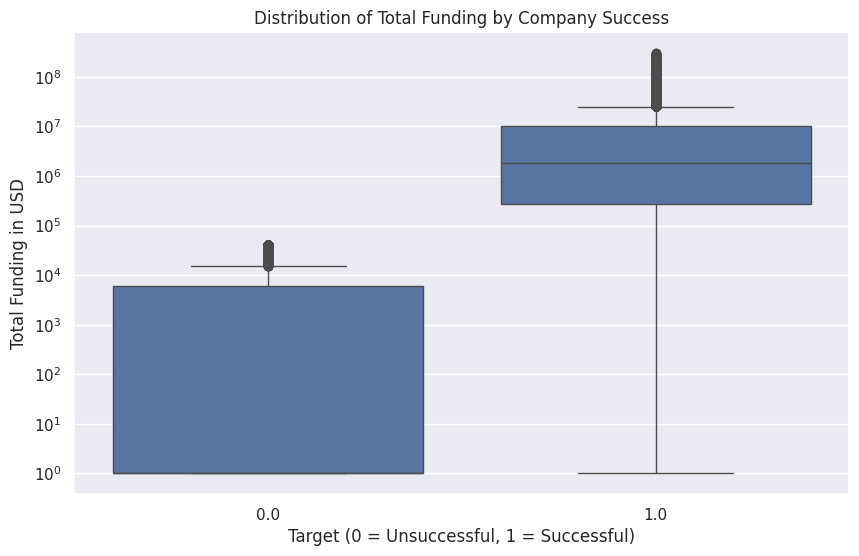

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='funding_total_usd', data=df_features_merged)
plt.title('Distribution of Total Funding by Company Success')
plt.xlabel('Target (0 = Unsuccessful, 1 = Successful)')
plt.ylabel('Total Funding in USD')
plt.yscale('log')
plt.show()

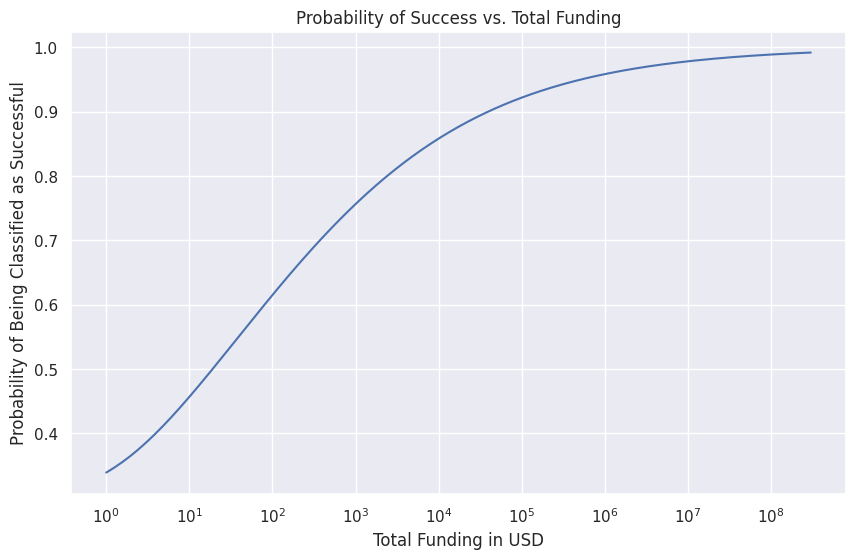

In [83]:

df_features_merged['funding_total_usd_log'] = np.log1p(df_features_merged['funding_total_usd'])

model = LogisticRegression()
model.fit(df_features_merged[['funding_total_usd_log']], df_features_merged['Target'])

funding_range = np.linspace(df_features_merged['funding_total_usd_log'].min(),
                            df_features_merged['funding_total_usd_log'].max(), 300)

funding_df = pd.DataFrame(funding_range, columns=['funding_total_usd_log'])

probabilities = model.predict_proba(funding_df)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(np.expm1(funding_range), probabilities)
plt.title('Probability of Success vs. Total Funding')
plt.xlabel('Total Funding in USD')
plt.ylabel('Probability of Being Classified as Successful')
plt.xscale('log')
plt.show()

In [84]:
successful_companies = df_features_merged[df_features_merged['Target'] == 1]
unsuccessful_companies = df_features_merged[df_features_merged['Target'] == 0]

Top 10 Regions by Highest Success Rate:
               Successful  Total  Success Rate (%)
region                                            
A Coruna              2.0      2             100.0
Frederiksberg         3.0      3             100.0
Lubeck                1.0      1             100.0
Lucca                 1.0      1             100.0
Lulea                 1.0      1             100.0
Lviv                  1.0      1             100.0
Lysaker               2.0      2             100.0
MAF - Other           1.0      1             100.0
MDA - Other           1.0      1             100.0
MLT - Other           1.0      1             100.0

Top 10 Regions by Lowest Success Rate:
               Successful  Total  Success Rate (%)
region                                            
Los Cabos             0.0      1               0.0
Hainan                0.0      1               0.0
Santo Domingo         0.0      1               0.0
Wetzlar               0.0      1               0.0
Il

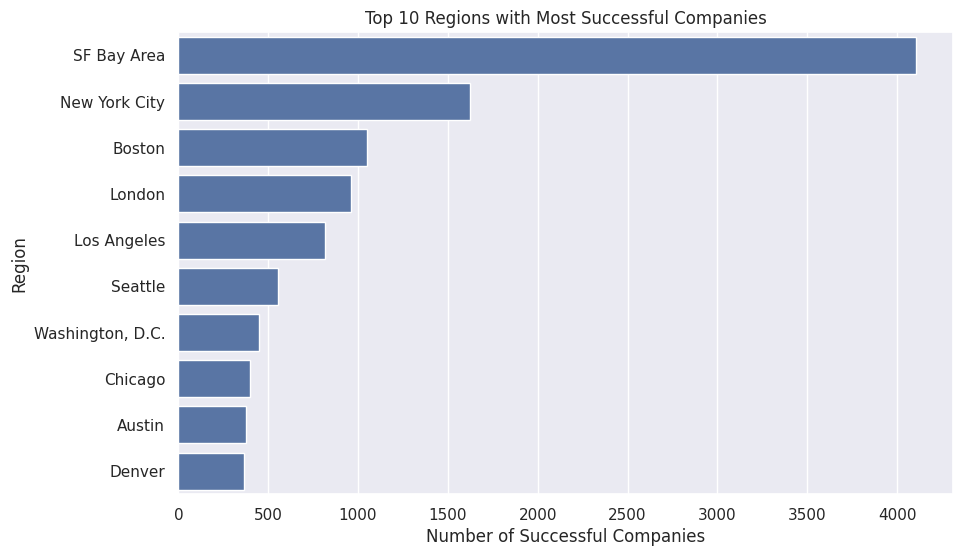

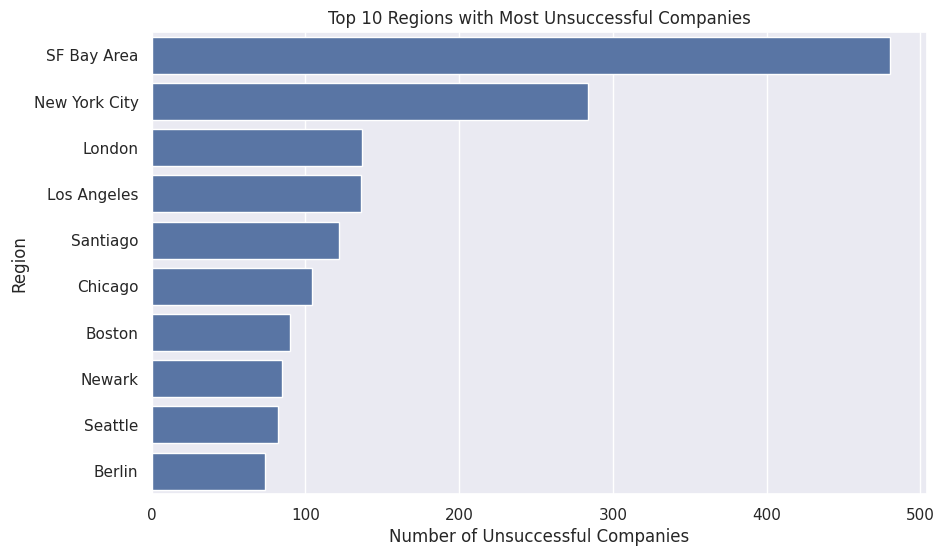

In [85]:
success_by_region = successful_companies['region'].value_counts()
unsuccess_by_region = unsuccessful_companies['region'].value_counts()
total_companies_per_region = df_features_merged['region'].value_counts()

region_summary_df = pd.DataFrame({
    'Total': total_companies_per_region,
    'Successful': success_by_region,
    'Unsuccessful': unsuccess_by_region
})

region_summary_df.fillna(0, inplace=True)

region_summary_df['Success Rate (%)'] = (region_summary_df['Successful'] / region_summary_df['Total'] * 100).round(2)

top_success_rates = region_summary_df.sort_values(by='Success Rate (%)', ascending=False).head(10)
bottom_success_rates = region_summary_df.sort_values(by='Success Rate (%)').head(10)


print("Top 10 Regions by Highest Success Rate:")
print(top_success_rates[['Successful', 'Total', 'Success Rate (%)']])
print("\nTop 10 Regions by Lowest Success Rate:")
print(bottom_success_rates[['Successful', 'Total', 'Success Rate (%)']])

plt.figure(figsize=(10, 6))
sns.barplot(x=success_by_region.head(10).values, y=success_by_region.head(10).index)
plt.title('Top 10 Regions with Most Successful Companies')
plt.xlabel('Number of Successful Companies')
plt.ylabel('Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=unsuccess_by_region.head(10).values, y=unsuccess_by_region.head(10).index)
plt.title('Top 10 Regions with Most Unsuccessful Companies')
plt.xlabel('Number of Unsuccessful Companies')
plt.ylabel('Region')
plt.show()

## 3.4.Correlation

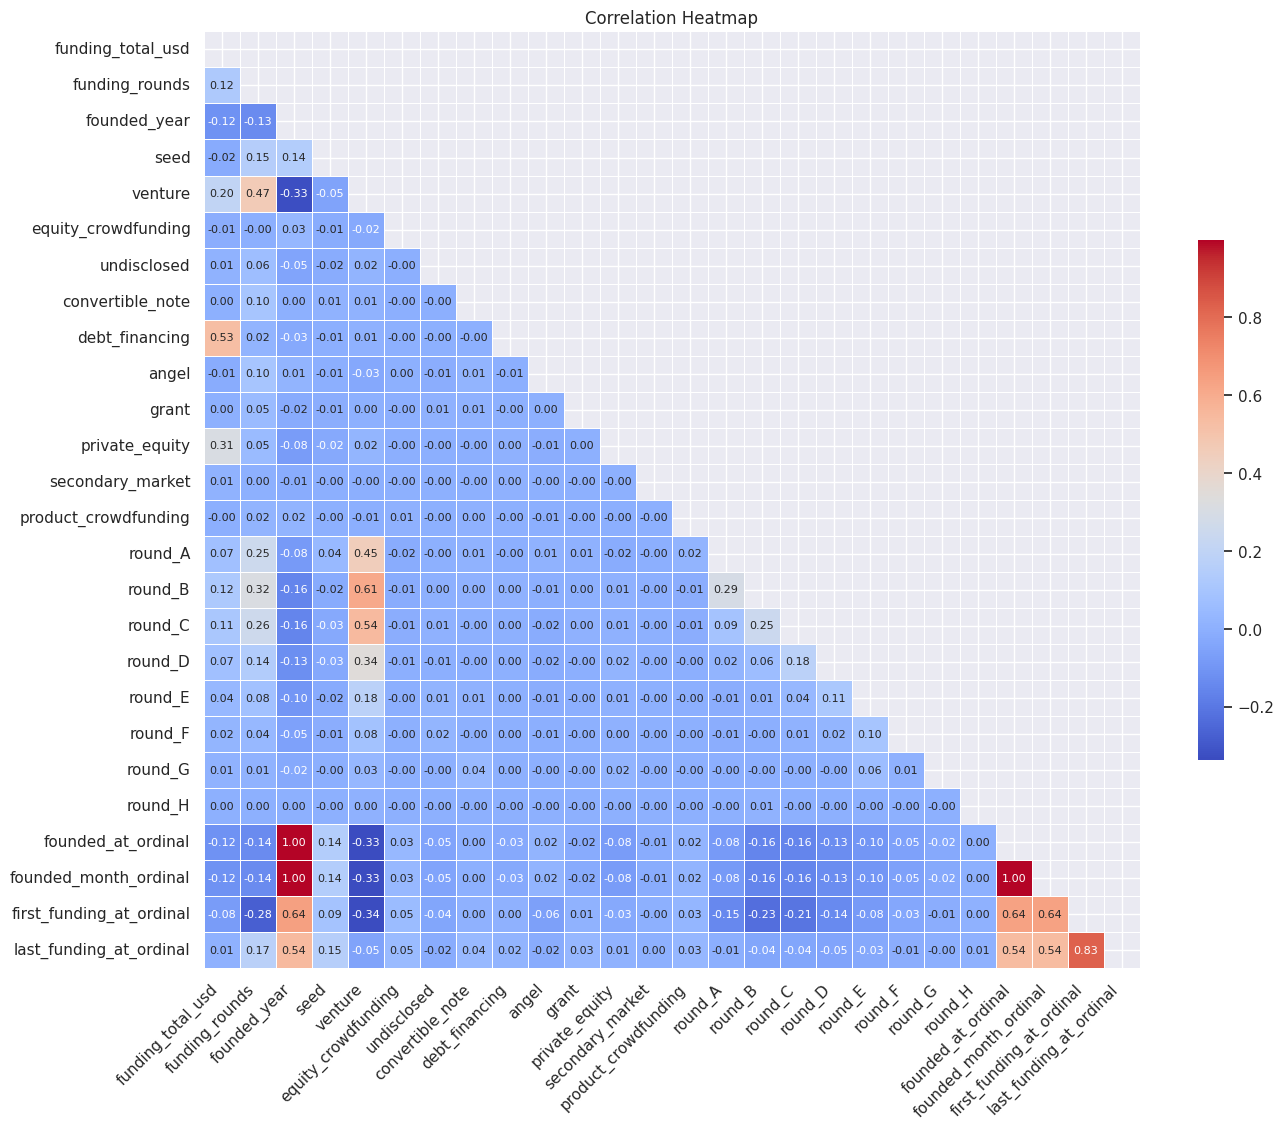

In [86]:
corr_matrix = df_clean.select_dtypes(include=['int64', 'float64']).corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

Dive into variable "Status"

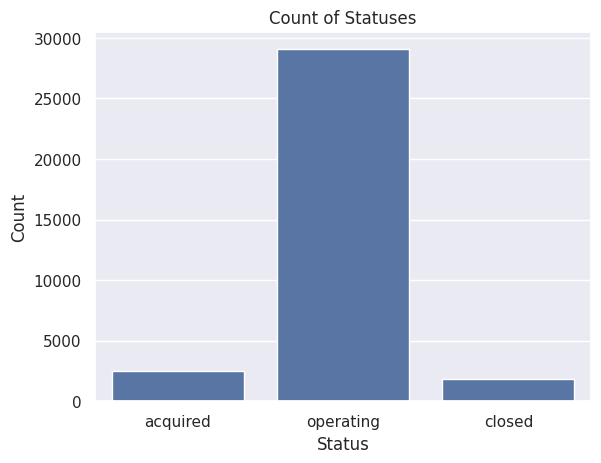

In [87]:
sns.countplot(x='status', data=df_clean)

plt.title('Count of Statuses')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [88]:
grouped = df_clean.groupby("status")["round_A"].count()

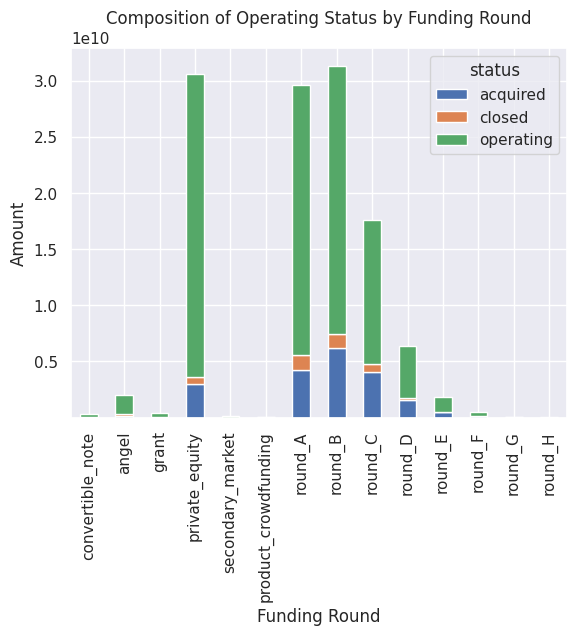

In [89]:
grouped = df_clean.groupby('status')[['convertible_note',
       'angel', 'grant', 'private_equity',
       'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G','round_H']].sum()

grouped.transpose().plot(kind='bar', stacked=True)

plt.title('Composition of Operating Status by Funding Round')
plt.xlabel('Funding Round')
plt.ylabel('Amount')

plt.show()

dive into funding total and rounds

Text(0.5, -0.01, 'Correlation coefficient: 0.12')

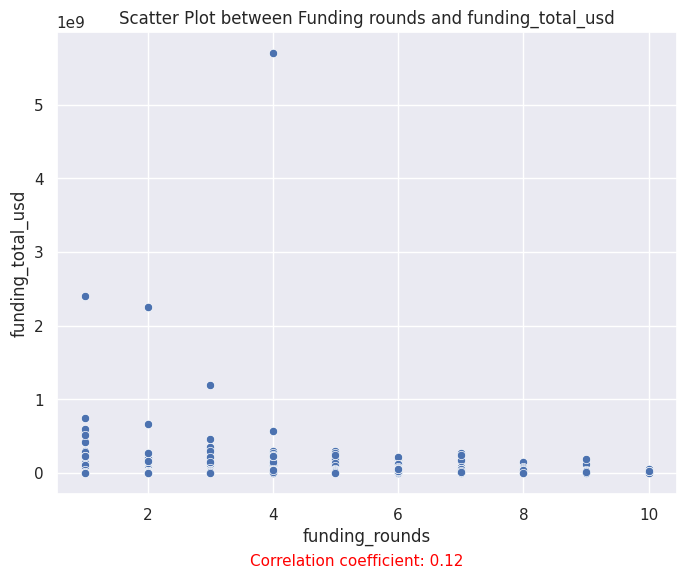

In [90]:
corr_value = df_clean['funding_rounds'].corr(df_clean['funding_total_usd'])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='funding_rounds', y='funding_total_usd')
plt.title('Scatter Plot between Funding rounds and funding_total_usd')
plt.figtext(0.5, -0.01, f'Correlation coefficient: {corr_value:.2f}', ha="center", fontsize=11, color="red")

In [91]:
df_clean['country_code'].nunique()

108

In [92]:
total_companies = df_clean['name'].nunique()

country_company_counts = df_clean.groupby('country_code')['name'].nunique().sort_values(ascending=False)

country_company_percentages = (country_company_counts / total_companies) * 100

top_10_country_percentages = country_company_percentages.head(10)
print(top_10_country_percentages)

country_code
USA    60.458977
GBR     5.252737
CAN     2.885856
DEU     2.000900
FRA     1.832908
IND     1.802910
ISR     1.607920
CHN     1.520924
ESP     1.202940
IRL     0.707965
Name: name, dtype: float64


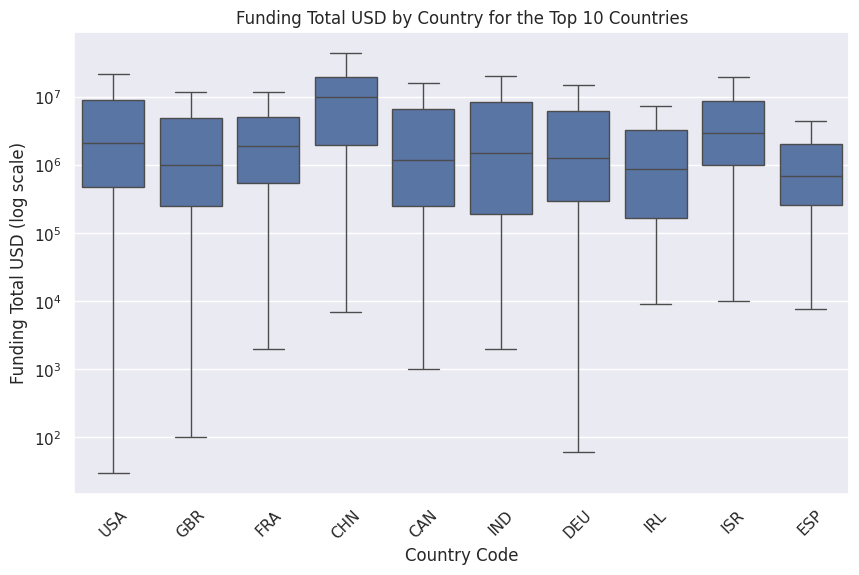

In [93]:
top_10_countries = df_clean['country_code'].value_counts().head(10).index.tolist()

top_countries_df = df_clean[df_clean['country_code'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_countries_df, x='country_code', y='funding_total_usd', showfliers=False)
plt.xticks(rotation=45)
plt.title('Funding Total USD by Country for the Top 10 Countries')
plt.xlabel('Country Code')
plt.ylabel('Funding Total USD (log scale)')
plt.yscale('log')

plt.show()


In [94]:
print(df_clean['region'].unique())
print(df_clean['region'].nunique())

['New York City' 'Tallinn' 'London' 'Dallas' nan 'Springfield, Illinois'
 'Santiago' 'Orlando' 'Baltimore' 'Portland, Oregon' 'SF Bay Area'
 'Seattle' 'Paris' 'Beijing' 'Madison' 'Toronto' 'Cleveland' 'Sydney'
 'Boston' 'Shanghai' 'Chicago' 'TX - Other' 'Melbourne' 'Providence'
 'Timisoara' 'NLD - Other' 'Los Angeles' 'Stockholm' 'Guangzhou'
 'Copenhagen' 'Bangalore' 'Singapore' 'Orange County, California'
 'Philadelphia' 'Manchester, New Hampshire' 'Berlin' 'Houston'
 'Shreveport' 'Albany, New York' 'Asheville' 'BEL - Other'
 'Washington, D.C.' 'Atlanta' 'IRL - Other' 'Roncade' 'New Delhi'
 'NY - Other' 'Tel Aviv' "Florida's Space Coast" 'Salisbury'
 'Rochester, New York' 'Madrid' 'Indianapolis' 'Denver' 'Bangkok' 'Moscow'
 'Brisbane' 'Auckland' 'Brussels' 'Cedar Rapids' 'VT - Other' 'Sacramento'
 'Vancouver' 'Las Vegas' 'Newark' 'Prague' 'Pittsburgh' 'Ottawa'
 'Frankfurt' 'Detroit' 'ESP - Other' 'CHN - Other' 'Geneva' 'Curitiba'
 'Bolzano' 'Amsterdam' 'Cincinnati' 'San Diego' 'Minnea

In [95]:
df_clean.groupby('region')['name'].count().sort_values(ascending = False).head(10) # Top 10 regions


,name
region,
SF Bay Area,4904
New York City,2026
Boston,1204
London,1156
Los Angeles,1019
Seattle,677
"Washington, D.C.",540
Chicago,531
Austin,461


dive into markets and funding

In [96]:
df_clean['market'].nunique()

725

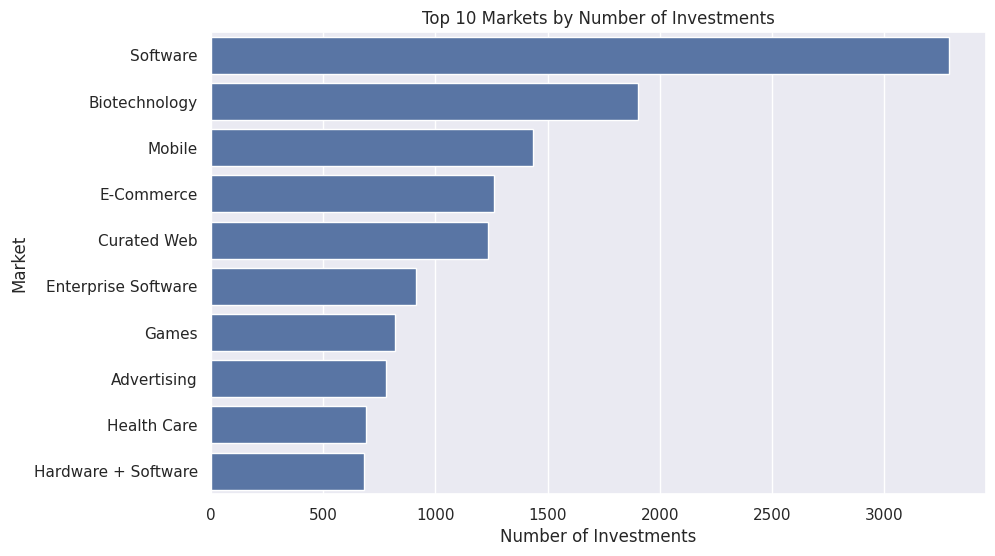

In [97]:
top_markets = df_clean['market'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_markets.values, y=top_markets.index)
plt.title('Top 10 Markets by Number of Investments')
plt.xlabel('Number of Investments')
plt.ylabel('Market')
plt.show()

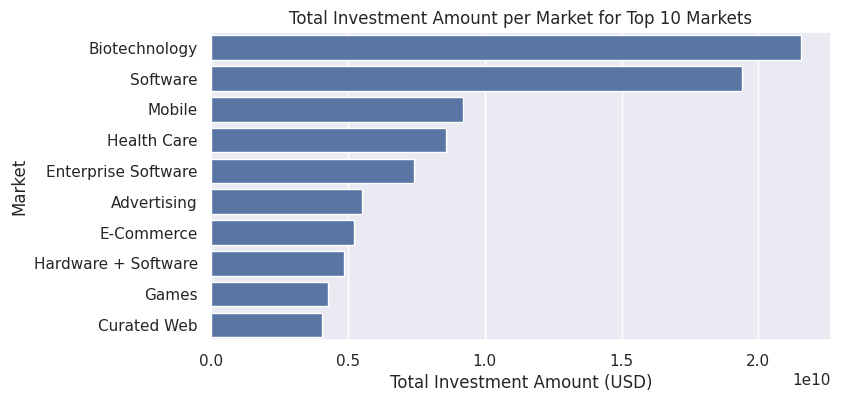

In [98]:
top_markets = df_clean['market'].value_counts().head(10).index

top_markets_df = df_clean[df_clean['market'].isin(top_markets)]

market_investment_totals = top_markets_df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=market_investment_totals.values, y=market_investment_totals.index)
plt.title('Total Investment Amount per Market for Top 10 Markets')
plt.xlabel('Total Investment Amount (USD)')
plt.ylabel('Market')
plt.show()

Distribution of years in the dataset

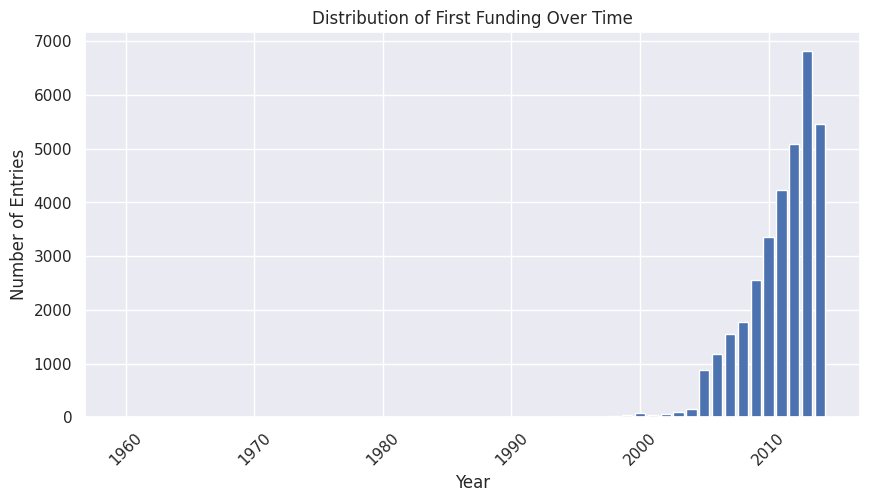

In [99]:
df_clean['first_funding_at_datetime'] = pd.to_datetime(df_clean['first_funding_at'])

df_clean['first_funding_at_year'] = df_clean['first_funding_at_datetime'].dt.year

first_funding_yearly_counts = df_clean['first_funding_at_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(first_funding_yearly_counts.index, first_funding_yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Distribution of First Funding Over Time')
plt.xticks(rotation=45)
plt.show()


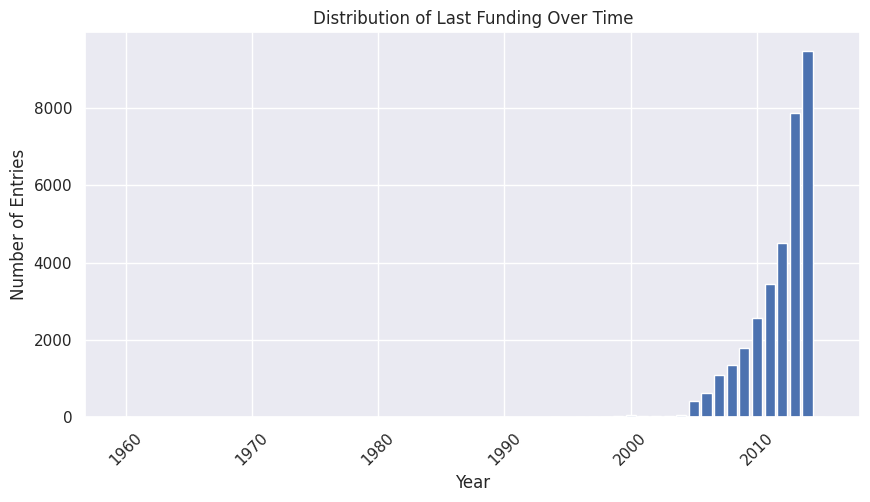

In [100]:
df_clean['last_funding_at_datetime'] = pd.to_datetime(df_clean['last_funding_at'])

df_clean['last_funding_at_year'] = df_clean['last_funding_at_datetime'].dt.year

yearly_counts = df_clean['last_funding_at_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Distribution of Last Funding Over Time')
plt.xticks(rotation=45)
plt.show()

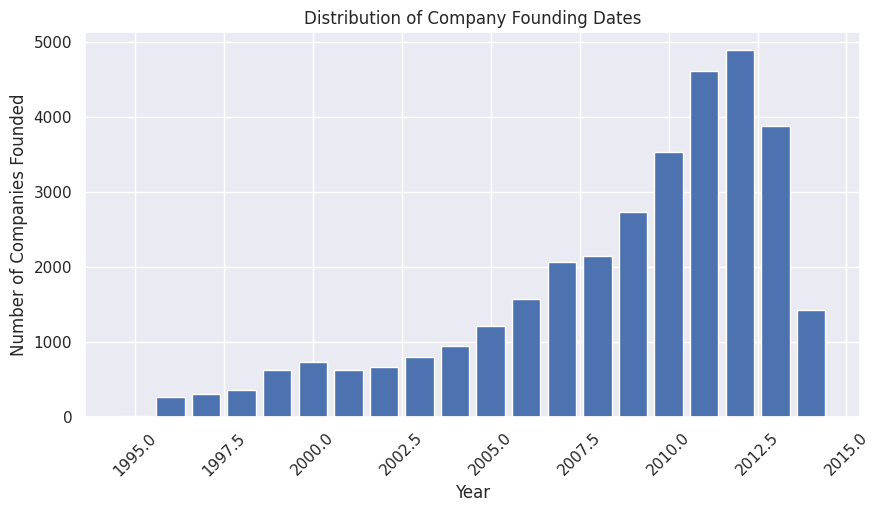

In [101]:
yearly_counts = df_clean['founded_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Companies Founded')
plt.title('Distribution of Company Founding Dates')
plt.xticks(rotation=45)
plt.show()

## 3.5 knn&random_forest model

[先點此下載modified_data2.csv](https://drive.google.com/file/d/15V2_EEqpS9Ko5LR2pKVO0mCh-c5WXD2k/view?usp=sharing)

In [102]:
!pip install gdown

# 匯入 gdown
import gdown

# 設置檔案 ID
file_id = '15V2_EEqpS9Ko5LR2pKVO0mCh-c5WXD2k'

# 下載檔案到 Colab
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'modified_data2.csv', quiet=False)

# 確認檔案是否下載成功
!ls

Downloading...
From: https://drive.google.com/uc?export=download&id=15V2_EEqpS9Ko5LR2pKVO0mCh-c5WXD2k
To: /content/modified_data2.csv
100%|██████████| 8.75M/8.75M [00:00<00:00, 144MB/s]

cleaned_data.csv  figure	  markets.csv	      sample_data
continents.csv	  Investment.csv  modified_data2.csv


In [103]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 1. 載入數據 / Load data
def load_data(file_path):
    print("Loading data...")
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
    return data

# 2. 處理類別變數 / Process categorical variables
def preprocess_data(data):
    print("Converting categorical columns to One-Hot Encoding...")
    categorical_columns = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)
    print("Categorical conversion completed!")
    return data

# 3. 切分數據為訓練集和測試集 / Split data into training and testing sets
def split_data(data, features, target_col="Target"):
    print("Splitting data into training and testing sets...")
    x = data[features]
    y = data[target_col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
    return x_train, x_test, y_train, y_test

# 4. 訓練隨機森林模型 / Train a Random Forest model
def train_rf(x_train, y_train, n_estimators=100):
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(x_train, y_train)
    return clf

# 5. 訓練KNN模型 / Train a K-Nearest Neighbors (KNN) model
def train_knn(x_train, y_train, n_neighbors=3):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    return model

# 6. 評估模型性能 / Evaluate model performance
def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return predictions

# 7. 混淆矩陣 / confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # 展開混淆矩陣中的值 / Unpack confusion matrix values
    print(f"True Positives (TP): {tp} - 預測成功且實際成功 / Predicted success and actually success")
    print(f"True Negatives (TN): {tn} - 預測失敗且實際失敗 / Predicted failure and actually failure")
    print(f"False Positives (FP): {fp} - 預測成功但實際失敗 / Predicted success but actually failure")
    print(f"False Negatives (FN): {fn} - 預測失敗但實際成功 / Predicted failure but actually success")

    figure_dir = "figure"
    os.makedirs(figure_dir, exist_ok=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Success"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("confusion_matrix")

    # 保存混淆矩陣圖片 / Save confusion matrix plot
    plt.savefig(os.path.join(figure_dir, "confusion_matrix.png"))
    plt.close()

# 8. 繪製隨機森林特徵重要性 / Plot feature importance of Random Forest
def plot_feature_importance(clf, X):
    feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)

    figure_dir = "figure"
    os.makedirs(figure_dir, exist_ok=True)

    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar')
    plt.title("Top 10 Feature Importances")
    plt.tight_layout()

    # 保存特徵重要性圖 / Save feature importance plot
    plt.savefig(os.path.join(figure_dir, "feature_importances.png"))
    plt.close()

# 主函數執行整個流程 / Main function to execute the workflow
def main():
    # 載入和處理數據 / Load and preprocess data
    data = load_data("modified_data2.csv")
    data = preprocess_data(data)

    # 定義用於訓練的特徵 / Define features for training
    features = [
        "seed", "venture", "equity_crowdfunding", "undisclosed", "convertible_note",
        "debt_financing", "angel", "grant", "private_equity", "secondary_market", "product_crowdfunding",
        "round_A", "round_B", "round_C", "round_D", "round_E", "round_F", "round_G", "round_H", "quater",
        "founded_at_ordinal", "founded_month_ordinal", "first_funding_at_ordinal", "last_funding_at_ordinal",
        "Industry_Group", "continent", "funding_duration_days", "avg_days_between_round",
        "avg_years_between_round", "avg_raised_amount_usd", "years_operating"
    ]

    # 確保特徵存在於數據中 / Ensure features exist in the data
    features = [col for col in features if col in data.columns]

    # 切分數據 / Split data
    x_train, x_test, y_train, y_test = split_data(data, features)

    # 訓練並評估隨機森林模型 / Train and evaluate Random Forest model
    rf_model = train_rf(x_train, y_train)
    print("--------------------------------------")
    print("Evaluating Random Forest model performance...")
    rf_pred = evaluate_model(rf_model, x_test, y_test)
    plot_confusion_matrix(y_test, rf_pred)
    plot_feature_importance(rf_model, x_train)

    # 訓練並評估KNN模型 / Train and evaluate KNN model
    knn_model = train_knn(x_train, y_train)
    print("--------------------------------------")
    print("Evaluating KNN model performance...")
    knn_pred = evaluate_model(knn_model, x_test, y_test)
    plot_confusion_matrix(y_test, knn_pred)

# 執行主函數 / Execute the main function
if __name__ == "__main__":
    main()


Loading data...
Data loaded successfully!
Converting categorical columns to One-Hot Encoding...
Categorical conversion completed!
Splitting data into training and testing sets...
--------------------------------------
Evaluating Random Forest model performance...
Accuracy: 0.9953
Precision: 0.9954
Recall: 0.9953
F1 Score: 0.9954
True Positives (TP): 4831 - 預測成功且實際成功 / Predicted success and actually success
True Negatives (TN): 936 - 預測失敗且實際失敗 / Predicted failure and actually failure
False Positives (FP): 4 - 預測成功但實際失敗 / Predicted success but actually failure
False Negatives (FN): 23 - 預測失敗但實際成功 / Predicted failure but actually success
--------------------------------------
Evaluating KNN model performance...
Accuracy: 0.9815
Precision: 0.9821
Recall: 0.9815
F1 Score: 0.9817
True Positives (TP): 4776 - 預測成功且實際成功 / Predicted success and actually success
True Negatives (TN): 911 - 預測失敗且實際失敗 / Predicted failure and actually failure
False Positives (FP): 29 - 預測成功但實際失敗 / Predicted success b